<a href="https://colab.research.google.com/github/Squenger/SV-Machines/blob/main/SINC_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:78: SyntaxWarning: invalid escape sequence '\e'
<>:78: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1686008871.py:78: SyntaxWarning: invalid escape sequence '\e'
  ax.set_title(f"$\epsilon = {eps}$")


Training SVR models...
Displaying figures...


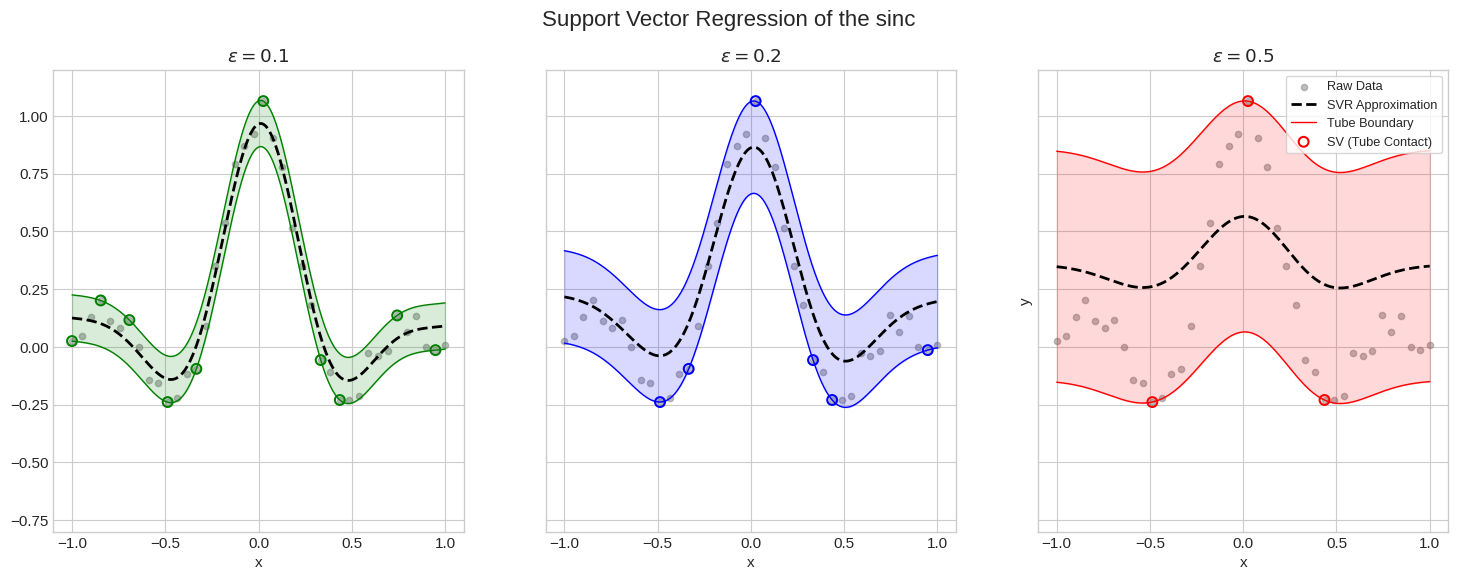

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR


#DATA generation
np.random.seed(42)

X_train = np.linspace(-1, 1, 40).reshape(-1, 1)

y_target = np.sin(np.pi * 3 * X_train).ravel() / (np.pi * 3 * X_train).ravel()
y_target[np.isnan(y_target)] = 1.0

noise = np.random.normal(0, 0.05, size=y_target.shape)
y_train = y_target + noise

X_plot = np.linspace(-1, 1, 500).reshape(-1, 1)

#Preparation of the fitting

epsilons = [0.1, 0.2, 0.5] #We choos the different values of epsilon we want to test
colors = ['green', 'blue', 'red']
results = []

print("Training SVR models...")
for i, eps in enumerate(epsilons):
    svr = SVR(kernel='rbf', C=100, gamma=10, epsilon=eps) #We use SVR from sklearn

    #C quantifies the trade-off between the simplicity of the curve (smoothness)
    #and minimizing the error

    #gamma is specific to the gaussian kernel
      # High gamma: The Gaussian curve around each point is very
      #narrow (sharp peak). The influence is very localized.
      #The final curve will be very bumpy and discontinuous.

      # Low gamma: The Gaussian curve is large.
      #The influence of a point is felt far away. The final curve will be very
      #smooth (almost linear if gamma is close to 0).

    svr.fit(X_train, y_train)

    y_pred = svr.predict(X_plot)

    results.append({
        'epsilon': eps,
        'model': svr,
        'y_pred': y_pred,
        'sv_indices': svr.support_,
        'color': colors[i]
    })

plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 11

fig1, axes1 = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
fig1.suptitle('Support Vector Regression of the sinc', fontsize=16, y=0.98)

for i, res in enumerate(results):
    ax = axes1[i]
    eps = res['epsilon']
    y_pred = res['y_pred']
    color = res['color']
    sv_idx = res['sv_indices']

    ax.scatter(X_train, y_train, color='gray', s=20, alpha=0.5, label='Raw Data')

    ax.plot(X_plot, y_pred, color='black', linestyle='--', linewidth=2, label='SVR Approximation')

    ax.plot(X_plot, y_pred + eps, color=color, linewidth=1, label='Tube Boundary')
    ax.plot(X_plot, y_pred - eps, color=color, linewidth=1)
    ax.fill_between(X_plot.ravel(), y_pred - eps, y_pred + eps, color=color, alpha=0.15)

    ax.scatter(X_train[sv_idx], y_train[sv_idx],
               s=50, facecolors='none', edgecolors=color, linewidth=1.5,
               label='SV (Tube Contact)')

    ax.set_title(f"$\epsilon = {eps}$")
    ax.set_ylim(-0.8, 1.2)
    ax.set_xlabel('x')


    if i == 2:
        ax.set_ylabel('y')
        ax.legend(loc='upper right', fontsize='small', frameon=True)


print("Displaying figures...")
plt.show()